# Comparing Reddit Comment Scores Based on Political Text

This is a graph looking at the avereage comment score on Reddit for comments that mention words associated with Republicans, Democrats, or General Political comments.


In [ ]:
#First we need to get comments
#Note I have already done this and removed my reddit username and password
import pandas as pd
import praw

reddit = praw.Reddit(client_id="",
                     client_secret="",
                     user_agent="Python data scrap for analyses ()",
                     username="",
                     password="!")

comments=[]
subreddit_list = ['Politics', 'worldnews', 'news']
for subreddits in subreddit_list:
    hot = reddit.subreddit(subreddits).top(limit=100, time_filter='month')
    sub = subreddits
    for submission in hot:
        print(submission.title)
        submission.comments.replace_more(limit=10)
        for comment in submission.comments.list():
            if type(comment.parent()) == praw.models.reddit.submission.Submission:
                comment.parent().body = 'NaN'
                comment.parent().score = 'NaN'
            comments.append([sub, submission.title, comment.author, comment.score, comment.body, comment.created_utc, comment.parent().body, comment.parent().score])
        
        

In [12]:
#Import the dataset
import pandas as pd
df = pd.read_csv('C:/Users/Pablo/Documents/Data Challenges/Reddit/Datasets/politics_comments.csv')

In [13]:
#Look at politics too
Republican_text = ('Donald|Trump|DonaldTrump|Pence|Romney|Reagan|Gop|Polanski|Republican|conservative|Mccain')
Democrat_text = ('Clinton|Hillary|Sanders|Yang|Bernie|Sanders|Biden|Obama|Barack|Democrat|Pelosi|Huckabee')
Politics_text = ('politic|politics|president|government|political|state|politicion|vote|law|governor|court|supreme|justice|police|federal|office|impeach|political party|dictator|legal|illegal|lobby')


df['Republican_text'] = df['body'].str.contains(Republican_text, case = False)
df['Democrat_text'] = df['body'].str.contains(Democrat_text, case = False)
df['Politics_text'] = df['body'].str.contains(Politics_text, case = False)


# Conduct sentiment analyses on the comments 

In [ ]:
#conduct sentiment analyses on the comments 
#This takes a while so I will have a df ready in the next cell

import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
df = pd.read_csv('C:/Users/dsmit/Documents/Data Challenges/Reddit/Datasets/comments_processed.csv')
#Our goal here is to conduct sentiment analyses of the comments
df = df.dropna(subset=['body'])
sid = SentimentIntensityAnalyzer()
df2 = pd.DataFrame()


for i in df['body']:
    scores = sid.polarity_scores(i)

    #for key in sorted(scores):
        #print('{0}: {1} '.format(key, scores[key]), end='')

    if scores["compound"] >= 0.05:
        df2.loc[i,'sentiment1'] = 'positive'

    elif scores["compound"] <= -0.05:
        df2.loc[i,'sentiment1'] = 'negative'
    else:
        df2.loc[i,'sentiment1'] = 'neutral'
 
df.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)      
df = pd.concat([df, df2], axis=1)

# Adjust the dataset so we can plot

In [1]:
import pandas as pd

df = pd.read_csv('C:/Users\Pablo\Documents\Data Challenges\Reddit\Datasets\comments_processed_sentiment.csv')


dfpolitics = df[['score', 'Republican_text', 'Democrat_text', 'Politics_text', 'sentiment1']]

dfpolitics.loc[dfpolitics['Republican_text'] == True, 'Republican_text'] = dfpolitics['score']
dfpolitics.loc[dfpolitics['Democrat_text'] == True, 'Democrat_text'] = dfpolitics['score']
dfpolitics.loc[dfpolitics['Politics_text'] == True, 'Politics_text'] = dfpolitics['score']


dfpolitics = dfpolitics[['Republican_text', 'Democrat_text', 'Politics_text',  'sentiment1']]
dfpoliticslong = pd.melt(dfpolitics, id_vars=['sentiment1'], var_name = 'group',  value_name = 'score')
dfpoliticslong = dfpoliticslong[dfpoliticslong.score != False]
dfpoliticslong['score'] = dfpoliticslong.score.astype(float)


C:\Users\Pablo\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# Plot

[Text(0, 0, 'Republican'),
 Text(0, 0, 'Democrat'),
 Text(0, 0, 'General Politics')]

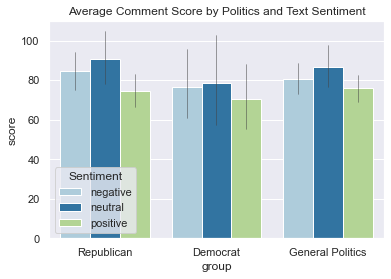

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()
sns.set_palette("Paired")
g = sns.barplot(data = dfpoliticslong, ci = 95, errwidth=.5
            ,x = 'group'
            ,y = 'score', hue = 'sentiment1',
            )
plt.title("Average Comment Score by Politics and Text Sentiment")
plt.legend(title = 'Sentiment')
g.set_xticklabels(['Republican','Democrat','General Politics'])